### Importing Model

In [1]:
import numpy as np
import pandas as pd
from Algorithm import logisticregression
from Algorithm import logloss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from Algorithm import encoder
import seaborn as sns
from Algorithm import Confusion_Matrix

### Reading and Analysing Dataset

In [2]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(columns=["id","Unnamed: 32"],inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Pre-Processing

In [4]:
X = df.drop(columns=['diagnosis']).values
y = df['diagnosis']

In [5]:
y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
from Normalizer import MinMaxScaler
scaler=MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
X_train,X_test,y_train,y_test_df=train_test_split(X,y,train_size=0.9, shuffle=True,random_state=42)

In [8]:
from imblearn.over_sampling import SMOTE
smot=SMOTE(random_state=42)
X_train,y_train_df=smot.fit_resample(X_train,y_train)

In [9]:
y_train_arr=y_train_df.values

In [10]:
y_train=encoder(y_train_arr,'B','M')

### Model Training

In [11]:
model=logisticregression(100000,0.1)
model.fit(X_train,y_train)

### Model Testing

In [12]:
y_test_arr=y_test_df.values

In [13]:
y_test=encoder(y_test_arr,'B','M')

In [14]:
predictions=model.test(X_test)

### Model Evaluation

##### LogLoss

In [15]:
logloss(predictions,y_test)

np.float64(0.06840021855400344)

In [16]:
y_pred=model.predict(X_test)

##### Confusion Matrix

In [17]:

c=Confusion_Matrix(y_test,y_pred)

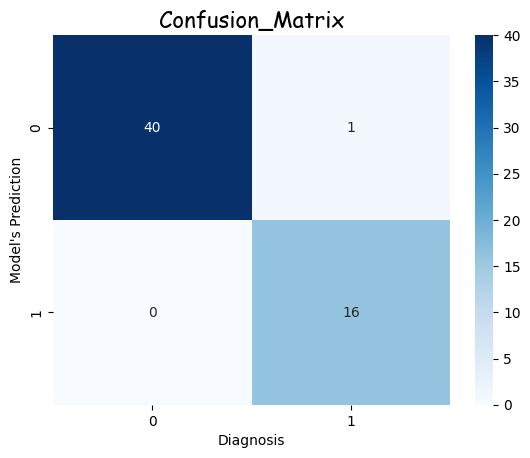

In [18]:
sns.heatmap(c, fmt='d', cmap='Blues',annot=True)
plt.title('Confusion_Matrix',font='Comic Sans MS',fontsize=16)
plt.xlabel('Diagnosis')
plt.ylabel("Model's Prediction")
plt.savefig('Confusion_Matrix.png')
plt.show()